In [1]:
conda install -c conda-forge textblob


Note: you may need to restart the kernel to use updated packages.Retrieving notices: ...working... done
Solving environment: ...working... done

# All requested packages already installed.






==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.2




In [1]:
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
A,Oliver Stone conducted interviews with Vladimi...,a
B,by William Wolf Ingmar Bergman stands outside ...,b
C,"Alfred Hitchcock and Saboteur It was 1941, and...",c
D,STARLOG INTERVIEW Director of “Dune” The filmm...,d
E,by Jon Burlingame and Gary Crowdus Ennio Morri...,e
F,by Leonard Quart Pauline Kael shook up the cri...,f


In [2]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
A,Oliver Stone conducted interviews with Vladimi...,a,0.065795,0.429883
B,by William Wolf Ingmar Bergman stands outside ...,b,0.100873,0.461472
C,"Alfred Hitchcock and Saboteur It was 1941, and...",c,0.110418,0.472020
D,STARLOG INTERVIEW Director of “Dune” The filmm...,d,0.155496,0.497764
E,by Jon Burlingame and Gary Crowdus Ennio Morri...,e,0.171581,0.469518
F,by Leonard Quart Pauline Kael shook up the cri...,f,0.167834,0.531671


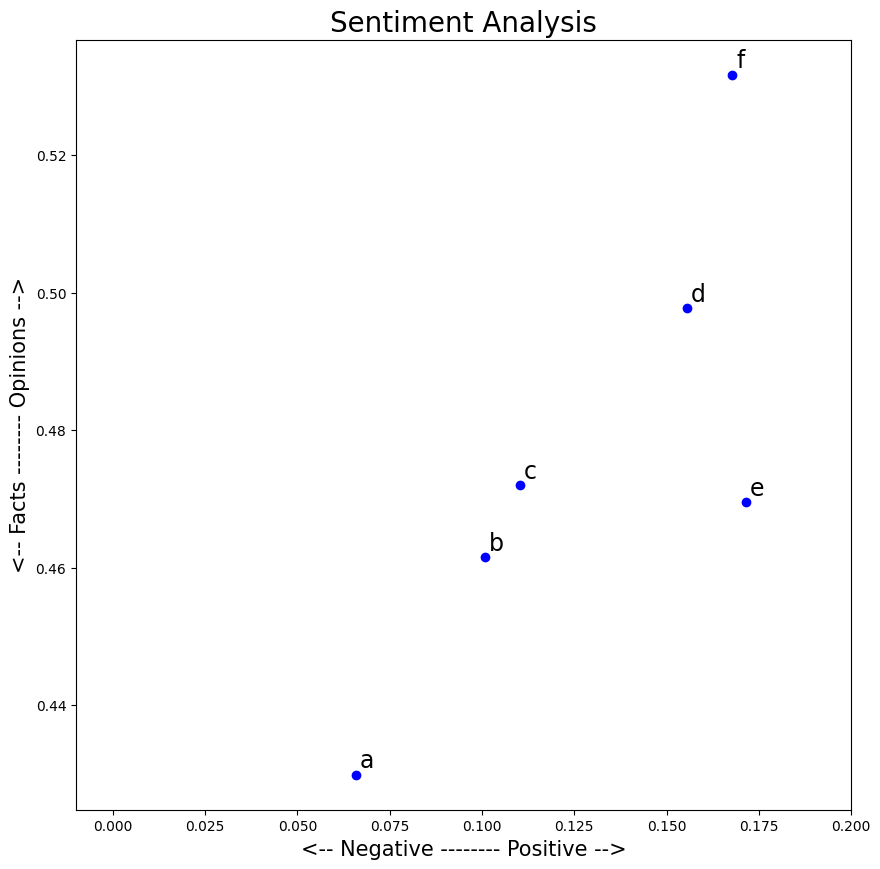

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, interviewer in enumerate(data.index):
    x = data.polarity.loc[interviewer]
    y = data.subjectivity.loc[interviewer]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=17)
    plt.xlim(-.01, .20) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Oliver Stone conducted interviews with Vladimir Putin on four separate trips to Russia for a total of nine days between July 2, 2015 and February 10, 2017. The following is a selection of parts of the interviews where Putin talks about Ukraine. * * * July 4, 2015 STONE: Okay, Ukraine. I want to say first of all that I interviewed Mr. Yanukovych here in Moscow a few months ago. And he told me his version of events. PUTIN: The thing is, here is an objective sequence of events. These events can be assessed differently, and you can name these events using different words, different formulas. But it’s quite evident you can follow what was happening day after day. And then you can give the people a chance to make an assessment of their own of what has really happened. STONE: Well, I would like your perspective on it from November to February 20th, 2013 into 2014. During those three months, there was quite a bit of protest in Ukraine. You must have been aware of it. PUTIN: Do you want to k

In [6]:
len(list_pieces)

6

In [7]:
len(list_pieces[0])

10

In [8]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.06457417582417582,
  0.09498325087610798,
  0.042554302422723456,
  0.03698590668590669,
  0.03362193362193363,
  0.06841231784088929,
  0.04291269841269841,
  0.08652397928868516,
  0.041258431490989615,
  0.1370320855614973],
 [0.14004103535353532,
  0.12125192012288787,
  0.11825396825396825,
  0.08908538510101008,
  0.0838869463869464,
  0.09466666666666669,
  -0.013412513412513408,
  0.1366935483870967,
  0.10211598746081503,
  0.09776501276501277],
 [0.13163192071086804,
  0.20175897631779985,
  0.047657450076804914,
  0.0035478158205430967,
  -0.018452380952380967,
  0.08242814242814245,
  0.10806673174320232,
  0.26701846590909095,
  0.07680539157811882,
  0.1535729746444032],
 [0.07480158730158734,
  0.11259259259259256,
  0.26621212121212123,
  0.18295312214667045,
  0.18894993894993897,
  0.18282312925170072,
  0.03754841649578491,
  0.288176406926407,
  0.17044723294723296,
  0.09077380952380953],
 [0.13768939393939392,
  0.058137801627384945,
  0.2503634085213033,
  0.

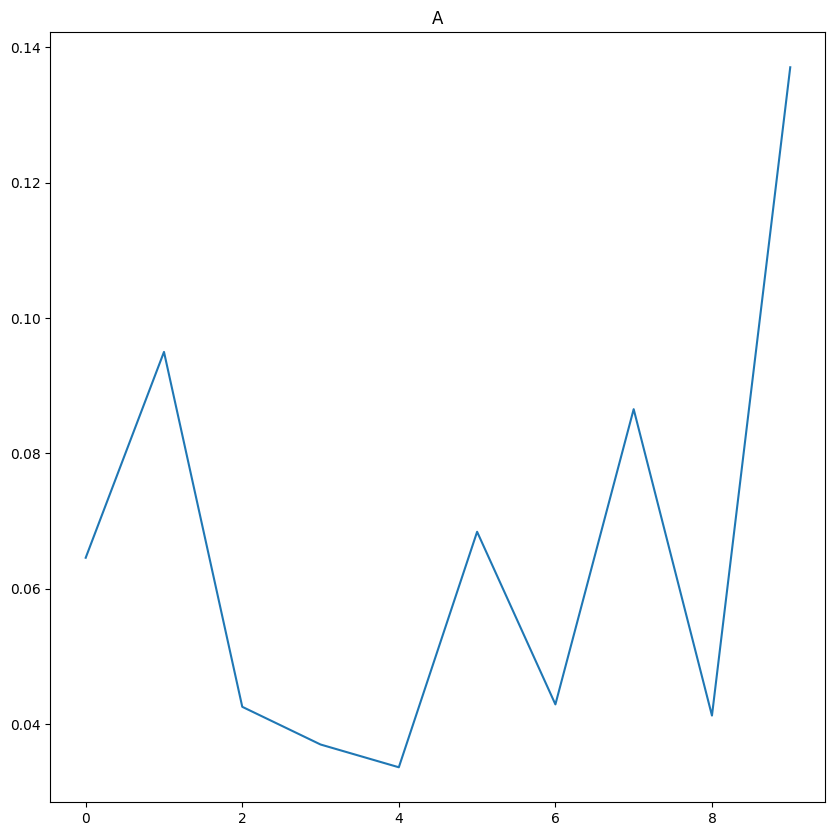

In [9]:
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

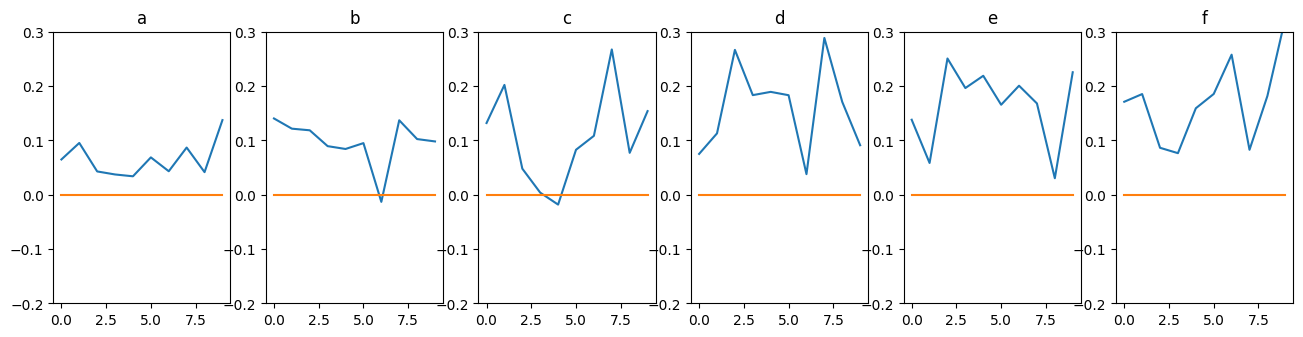

In [10]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, interviewer in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [11]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,45)
    list_pieces.append(split)
    
list_pieces

[['Oliver Stone conducted interviews with Vladimir Putin on four separate trips to Russia for a total of nine days between July 2, 2015 and February 10, 2017. The following is a selection of parts of the interviews where Putin talks about Ukraine. * * * July 4, 2015 STONE: Okay, Ukraine. I want to say first of all that I interviewed Mr. Yanukovych here in Moscow a few months ago. And he told me his version of events. PUTIN: The thing is, here is an objective sequence of events. These events can be assessed differently, and you can name these events using different words, different formulas. But it’s quite evident you can follow what was happening day after day. And then you can give the people a chance to make an assessment of their own of what has really happened. STONE: Well, I would like your perspective on it from November to February 20th, 2013 into 2014. During those three months, there was quite a bit of protest in Ukraine. You must have been aware of it. PUTIN: Do you want to k

In [12]:
len(list_pieces)

6

In [13]:
len(list_pieces[0])

45

In [14]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    

polarity_transcript

[[0.11000000000000001,
  -0.11941964285714285,
  0.09732993197278911,
  0.16785714285714287,
  -0.014583333333333335,
  0.17670995670995673,
  0.1592911255411255,
  0.12461802902979376,
  -0.12811507936507938,
  0.05651587301587302,
  0.11645502645502645,
  0.075,
  0.07039399092970522,
  -0.09135101010101011,
  0.22195767195767194,
  0.06345804988662132,
  -0.043300865800865805,
  0.08388888888888887,
  -0.0141025641025641,
  0.08990929705215421,
  0.15582706766917293,
  -0.07596618357487923,
  -0.06628151260504203,
  0.008778258778258765,
  0.24722689075630253,
  0.1231190476190476,
  0.04496753246753246,
  0.1357142857142857,
  0.12170995670995674,
  0.09693722943722943,
  -0.0996869488536155,
  -0.04895833333333333,
  0.15895508658008659,
  0.14925120772946862,
  0.09464285714285715,
  -0.000712481962481965,
  0.04830485304169514,
  -0.09214535464535464,
  0.11442099567099565,
  0.08972027972027972,
  0.18367346938775508,
  0.14451581027667984,
  0.08556818181818182,
  0.1467132505

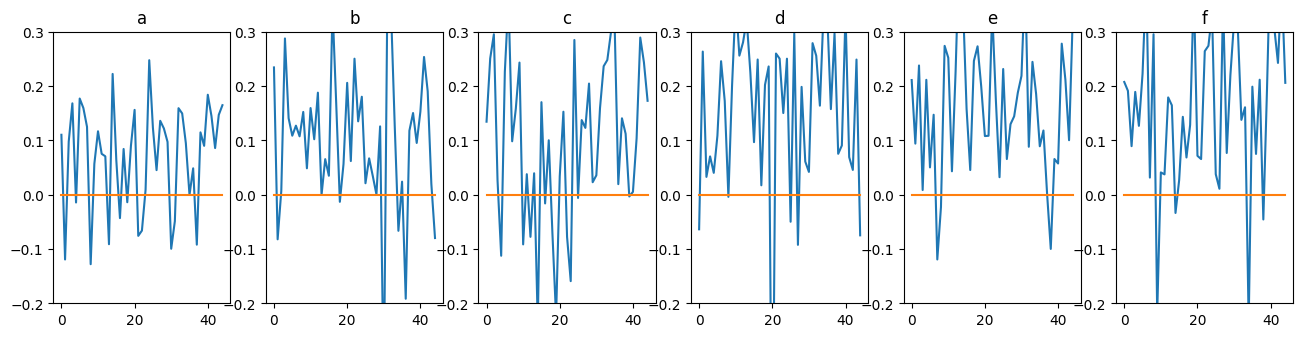

In [15]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, interviewer in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,45), np.zeros(45))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [16]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.subjectivity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.3695238095238095,
  0.46696428571428567,
  0.41011904761904766,
  0.3423400129282482,
  0.1416666666666667,
  0.48031746031746037,
  0.4917640692640693,
  0.5637127578304051,
  0.5110912698412697,
  0.5493571428571429,
  0.3430291005291005,
  0.13583333333333333,
  0.3367913832199546,
  0.46913780663780663,
  0.3264550264550265,
  0.4149886621315193,
  0.5550487012987013,
  0.29277777777777775,
  0.4288461538461539,
  0.48526077097505665,
  0.420652593021014,
  0.5234299516908213,
  0.5477941176470589,
  0.5427529260862594,
  0.5000280112044818,
  0.47045238095238096,
  0.3347818847818847,
  0.4833791208791208,
  0.41877705627705625,
  0.40248917748917756,
  0.3875837742504409,
  0.3680555555555555,
  0.4394117965367966,
  0.4432539682539684,
  0.32321428571428573,
  0.32060868424504785,
  0.35428685349737976,
  0.5181235431235431,
  0.43689935064935054,
  0.4528221778221778,
  0.38605442176870736,
  0.45072463768115945,
  0.34875,
  0.4858333333333334,
  0.46163003663003643],
 [0.

In [17]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,30)
    list_pieces.append(split)
    
list_pieces

[['Oliver Stone conducted interviews with Vladimir Putin on four separate trips to Russia for a total of nine days between July 2, 2015 and February 10, 2017. The following is a selection of parts of the interviews where Putin talks about Ukraine. * * * July 4, 2015 STONE: Okay, Ukraine. I want to say first of all that I interviewed Mr. Yanukovych here in Moscow a few months ago. And he told me his version of events. PUTIN: The thing is, here is an objective sequence of events. These events can be assessed differently, and you can name these events using different words, different formulas. But it’s quite evident you can follow what was happening day after day. And then you can give the people a chance to make an assessment of their own of what has really happened. STONE: Well, I would like your perspective on it from November to February 20th, 2013 into 2014. During those three months, there was quite a bit of protest in Ukraine. You must have been aware of it. PUTIN: Do you want to k

In [18]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    

polarity_transcript

[[-0.010357142857142862,
  0.09792328042328044,
  0.12874149659863945,
  0.114158667419537,
  0.15278178611511942,
  -0.0050965007215007145,
  0.051571637426900574,
  0.15,
  -0.027023809523809516,
  0.05521094402673349,
  -0.018097093382807666,
  0.1123015873015873,
  0.012830687830687833,
  0.1358985260770975,
  -0.04668458781362008,
  -0.03423502173502172,
  0.18135176651305687,
  0.07643471393471392,
  0.10071428571428571,
  0.12324967824967828,
  -0.08219336219336218,
  0.10047827172827171,
  0.12599326599326602,
  0.02247405372405373,
  0.07359461966604823,
  -0.03195045695045695,
  0.1198996458087367,
  0.15799512987012987,
  0.10775838744588744,
  0.15102380952380956],
 [0.20265151515151514,
  -0.05703463203463203,
  0.24204545454545454,
  0.11333333333333333,
  0.12619047619047621,
  0.12455555555555554,
  0.08717948717948719,
  0.10654761904761904,
  0.15714285714285717,
  -0.009168609168609168,
  0.14858333333333335,
  0.16489898989898993,
  0.04696969696969698,
  0.08358585

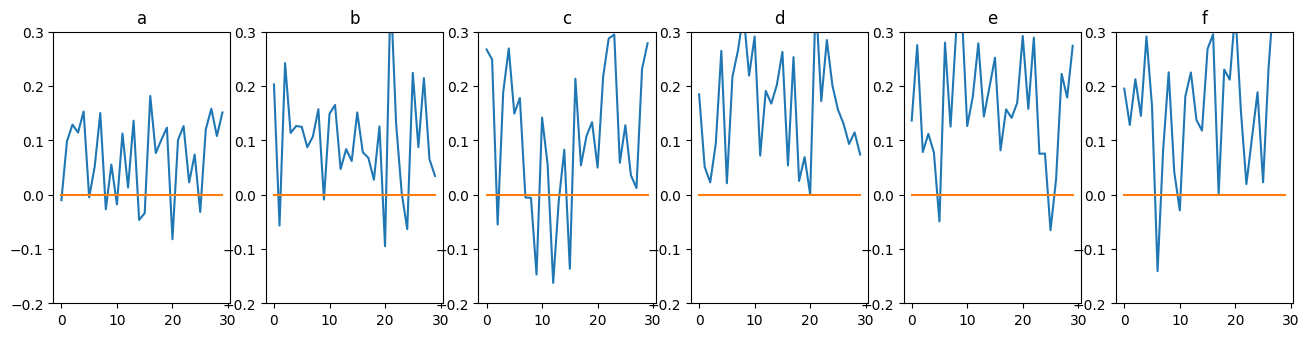

In [19]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, interviewer in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,30), np.zeros(30))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()